# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [68]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [4]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()
df_fraud = pd.DataFrame(fraud)

In [22]:
df_fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

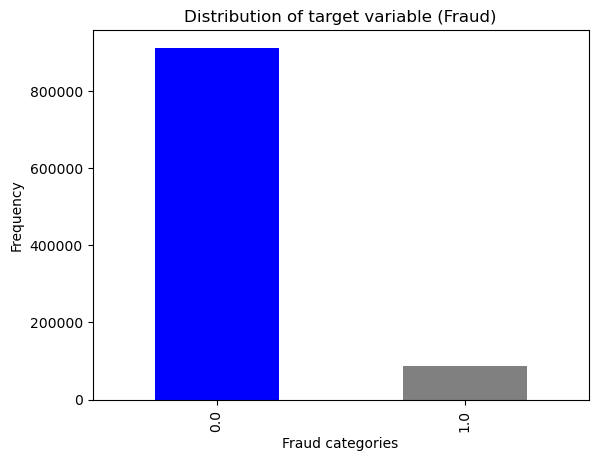

In [20]:
#What is the distribution of our target variable? 
fraud_counts = df_fraud['fraud'].value_counts() #counting the number of 'frauds'/'no fraud'

fraud_counts.plot(kind='bar', color=['blue', 'gray'])
plt.title('Distribution of target variable (Fraud)')
plt.xlabel('Fraud categories')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Can we say we're dealing with an imbalanced dataset?
# Answer: Yes we can because the fraud categories are not equally represented!

In [35]:
#2.Train a LogisticRegression.

#setting features and target
features = df_fraud.drop(columns=['fraud'])
target = df_fraud['fraud']

#train test split
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [38]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

c:\Users\ndemb\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
#3.Evaluate your model. 
#Take in consideration class importance, and evaluate it by selection the correct metric.
#Evaluating the model performance

log_reg.score(X_test_scaled, y_test)

c:\Users\ndemb\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.913088

In [45]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

c:\Users\ndemb\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95    228058
         1.0       0.50      0.51      0.51     21942

    accuracy                           0.91    250000
   macro avg       0.73      0.73      0.73    250000
weighted avg       0.91      0.91      0.91    250000



In [46]:
#4.Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. 
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)

train['fraud'] = y_train.values

fraud = train[train['fraud'] == 1]
no_fraud = train[train['fraud'] == 0]

In [51]:
fraud_oversample = resample(fraud, replace=True,
                            n_samples = len(no_fraud),
                            random_state=0)

In [55]:
train_over = pd.concat([fraud_oversample, no_fraud])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
31674,3.622495,-0.146958,-0.547798,0.366092,-0.733963,-0.333879,0.732651,1.0
501820,-0.393242,-0.177496,1.438807,-2.731553,1.362467,-0.333879,0.732651,1.0
491215,0.238794,-0.189489,2.096528,0.366092,-0.733963,-0.333879,0.732651,1.0
602315,-0.346108,-0.095590,1.177649,0.366092,1.362467,-0.333879,0.732651,1.0
528065,-0.252353,-0.138066,3.229700,0.366092,1.362467,-0.333879,0.732651,1.0
...,...,...,...,...,...,...,...,...
749995,0.127696,0.234807,-0.511418,0.366092,1.362467,-0.333879,0.732651,0.0
749996,0.916140,-0.175823,-0.544773,0.366092,1.362467,-0.333879,-1.364905,0.0
749997,-0.149085,0.014732,-0.050334,0.366092,-0.733963,-0.333879,-1.364905,0.0
749998,-0.348462,1.150686,-0.295985,0.366092,-0.733963,-0.333879,0.732651,0.0


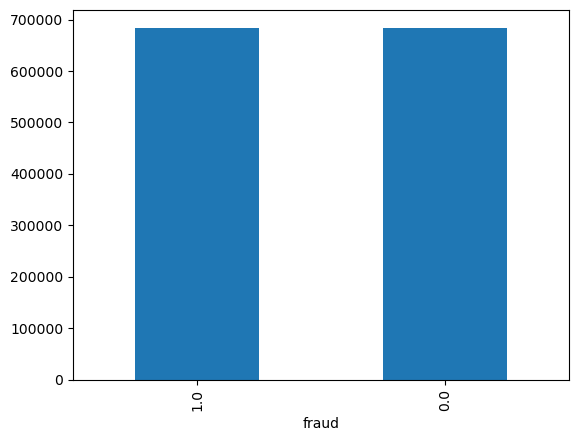

In [56]:
fraud_plt = train_over['fraud'].value_counts()
fraud_plt.plot(kind='bar')
plt.show()

In [57]:
#setting features and target
features = train_over.drop(columns=['fraud'])
target = train_over['fraud']

#train test split
X_train, X_test, y_train, y_test = train_test_split(features, target)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [60]:
#Evaluate the model. 
log_reg.score(X_test_scaled, y_test)

c:\Users\ndemb\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6692465013001432

In [61]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

c:\Users\ndemb\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75    170955
         1.0       0.99      0.34      0.51    171315

    accuracy                           0.67    342270
   macro avg       0.79      0.67      0.63    342270
weighted avg       0.79      0.67      0.63    342270



In [ ]:
# Does it improve the performance of our model?
# Answer: No it doesn't!

In [62]:
#5. Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. 
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)

train['fraud'] = y_train.values

fraud = train[train['fraud'] == 1]
no_fraud = train[train['fraud'] == 0]

no_fraud_undersample = resample(no_fraud, replace=False,
                            n_samples = len(fraud),
                            random_state=0)

In [63]:
train_under = pd.concat([no_fraud_undersample, fraud])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
494054,0.177882,-0.105271,-0.657970,0.367295,-0.665657,-0.24415,0.524279,0.0
603149,0.347140,-0.217797,-0.711627,0.367295,-0.665657,-0.24415,0.524279,0.0
935072,-0.380010,-0.216212,-0.352075,0.367295,-0.665657,-0.24415,0.524279,0.0
648906,-0.363453,-0.173660,-0.701557,0.367295,-0.665657,-0.24415,-1.907383,0.0
441433,-0.387976,0.483516,-0.509698,0.367295,-0.665657,-0.24415,-1.907383,0.0
...,...,...,...,...,...,...,...,...
1026800,-0.394291,-0.160674,1.980891,0.367295,-0.665657,-0.24415,0.524279,1.0
1026801,1.113093,-0.217428,0.404572,0.367295,-0.665657,-0.24415,0.524279,1.0
1026804,0.593251,0.171675,-0.627276,0.367295,-0.665657,-0.24415,0.524279,1.0
1026806,-0.398425,-0.204958,0.648604,-2.722609,-0.665657,-0.24415,0.524279,1.0


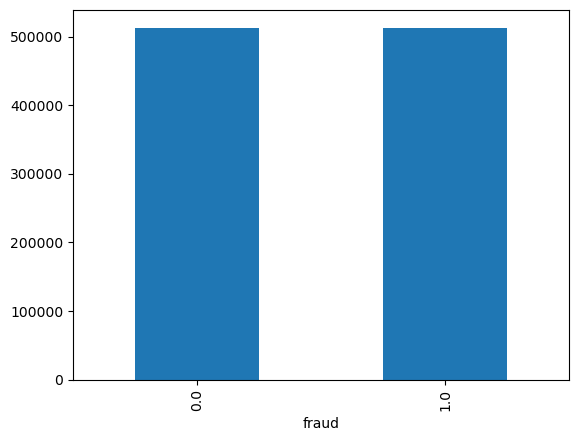

In [64]:
fraud_plt = train_under['fraud'].value_counts()
fraud_plt.plot(kind='bar')
plt.show()

In [65]:
#setting features and target
features = train_under.drop(columns=['fraud'])
target = train_under['fraud']

#train test split
X_train, X_test, y_train, y_test = train_test_split(features, target)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [67]:
#Evaluate the model. 
log_reg.score(X_test_scaled, y_test)

c:\Users\ndemb\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.9411446074228796

In [ ]:
# Does it improve the performance of our model?
# Answer: yes it did!

In [69]:
#6.Run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. 
#initializing SMOTE
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

#
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

#Train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [70]:
#evaluate the model
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94    128141
         1.0       0.93      0.95      0.94    128471

    accuracy                           0.94    256612
   macro avg       0.94      0.94      0.94    256612
weighted avg       0.94      0.94      0.94    256612



In [71]:
log_reg.score(X_test_scaled, y_test)

0.9411485043567721

In [ ]:
# Does it improve the performance of our model?
# Yes, it did!